In [2]:
import pandas as pd
from data.datamapping import k,s, z, flags, wes_show, del_mu, data_dir, process_step, data_out,img_out_path, plots
from data.datamapping import file_name, data_cols, dis_list, dis_flag, R_v, R, A, mag, colors, R_dic, fouque_extinction_ratios
from lvtlaw.main_modules import intro
intro()
data = pd.read_csv(f'data/input/{file_name}.csv')
#radial velocity and photometry for IRSB ralial voelocity, V and K band
data = data[['name', 'logP', dis_list[0], 'EBV', 'B_mag', 'V_mag', 'I_mag', 'J_mag', 'H_mag', 'K_mag']]
data = data.sort_values(by = ['logP'],ascending=True).dropna().reset_index(drop=True)

* * * * * * * * * * * * * * * * * * * * 
* * * * * * * * * * * * * * * * * * * * 


Master Thesis Project: 	Galactic BVIJHK Leavitt Law Calibration for R_v = 2.53 

  			To Refine systematic errors in luminosity, distance and reddening of individual Cepheid. 
			______________________________________________________

     			Author: Shubham Mamgain (mshubham00@gmail.com) 
     			Supervisor I: Dr. Jesper Storm (AIP Potsdam)
     			Supervisor II: Prof. Dr. Maria Rosa Cioni




			To begin the calibration process, store cleaned data at ./data/input/<file_name>.csv 

			For datafile selection (k) and columns mapping, edit ./data/datamapping.py file.

			Autosave (s = 1) | Paging (z = 0) | Generate Plots (plots = 0)

			k : 4
			data : 32_SMC_VIJK
			R_v : 2.53

			Processed data will be saved in ./data/processed/32_SMC_VIJK_s_2.53/ directory. 

##########################################################################################


KeyError: "['B_mag', 'H_mag'] not in index"

# Outliers

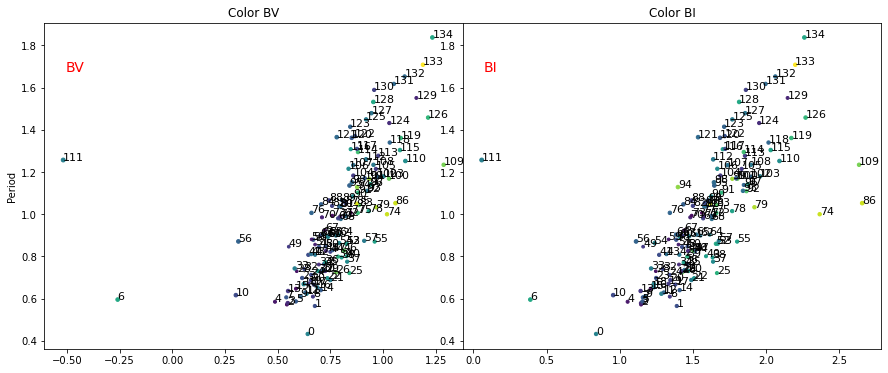

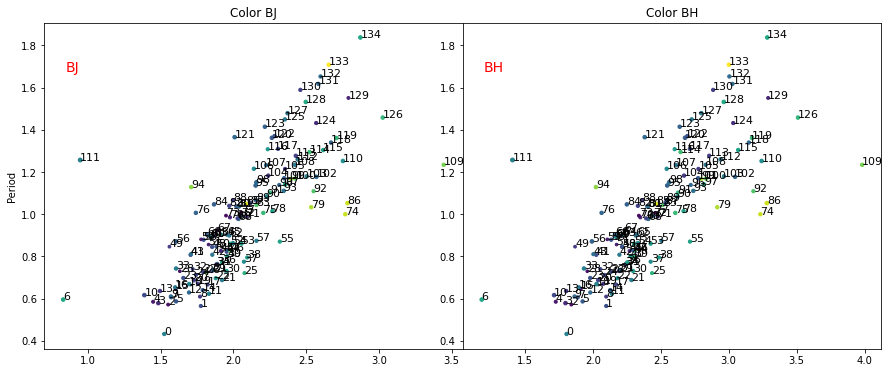

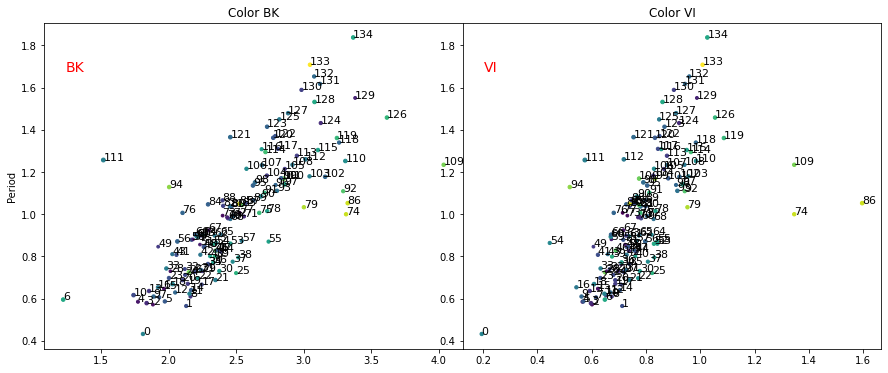

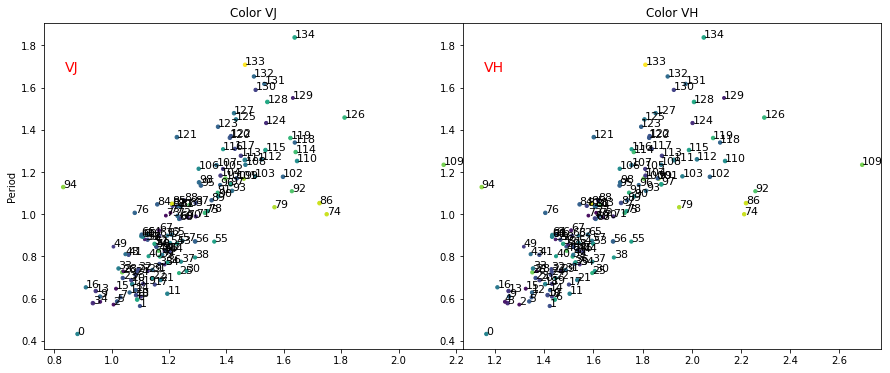

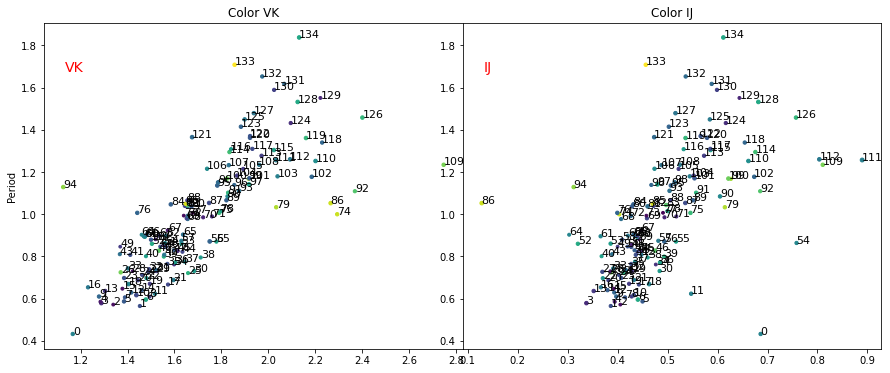

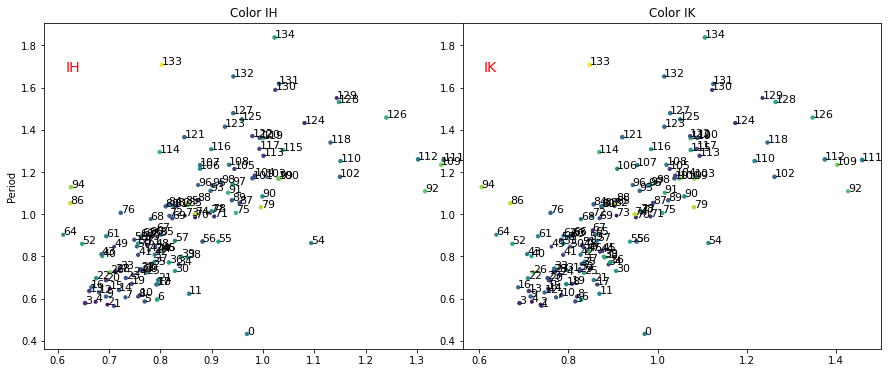

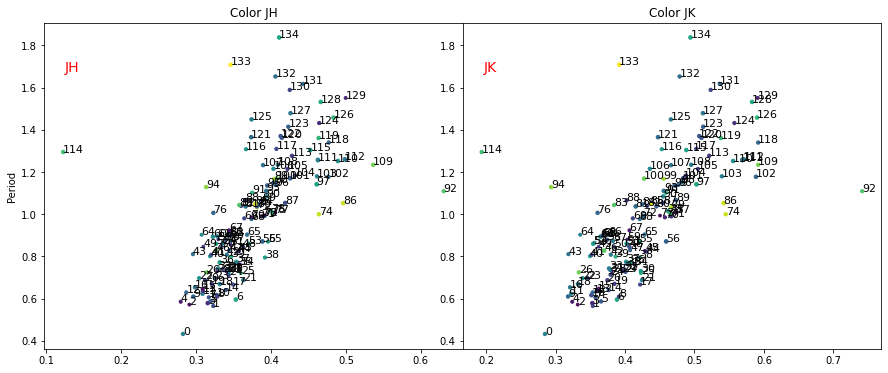

In [2]:
from lvtlaw.b_data_transform import color_period
color_period(data, ann= True, outliers = list(range(len(data))), s=0)

In [5]:
#outliers = [0,1,6,10,26,33,41,51,58,63,65,66,67,69,73,75,79,81,83,84,85,86, 101]
#outliers = [0,1,7,8, 44, 67, 81, 83, 85, 101]
#outliers = [0,1,7,8, 12, 40, 41, 44, 54, 56, 67, 74, 79, 81, 82, 83, 85, 89, 91, 95, 97, 100, 101, 102]
#out137 = [115, 93, 95, 134, 93, 112,110, 113, 0, 55, 103, 87, 133, 135, 65, 87, 65, 127, 122, 75, ]
#out_150 = [119,11,12,65,16,117, 102, 57, 127,100,139, 121] + [0,1,2,3, 19, 25,17, 64, 73, 59, 107, 113, 122, 138, 140, 109, 115, 132, 62, 87, 118, 85, 123, 131]
out_135 = [111,6,56,10,0,109,86,74,94,121,86,54,133,92,54,112,11,64,114,52,102,76,134,132]
result = [57,46,26,59]
deldel_135=[]#[37,43,45]
outliers = out_135+result
j = data.drop(index = outliers).reset_index()
j.to_csv(f'data/input/{len(j)}_IRSB.csv')
print(len(j))

#color_period(j, ann= True, outliers = [], s=0)

109


# Wesenheit deviation

In [7]:
len(j)

113

* * datamapping module loaded!
* * a_utils module loaded!
* * b_data_transform module loaded!
* * c_pl_pw module loaded!
* * d_del_del module loaded!
* * e_error_estimation module loaded!
* * f_star_wise module loaded!
* * g_result module loaded!
* * main_modules module loaded!
* * * * * * * * * * * * * * * * * * * * 
* * * * * * * * * * * * * * * * * * * * 


Master Thesis Project: 	Galactic BVIJHK Leavitt Law Calibration for R_v = 2.53 

  			To Refine systematic errors in luminosity, distance and reddening of individual Cepheid. 
			______________________________________________________

     			Author: Shubham Mamgain (mshubham00@gmail.com) 
     			Supervisor I: Dr. Jesper Storm (AIP Potsdam)
     			Supervisor II: Prof. Dr. Maria Rosa Cioni




			To begin the calibration process, store cleaned data at ./data/input/<file_name>.csv 

			For datafile selection (k) and columns mapping, edit ./data/datamapping.py file.

			Autosave (s = 1) | Paging (z = 0) | Generate Plots (plots = 0

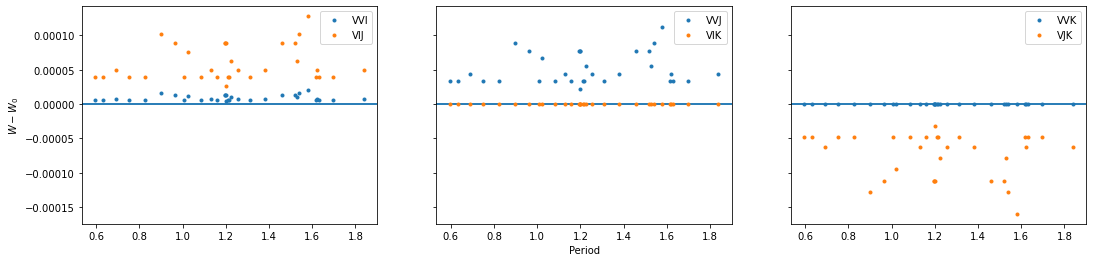

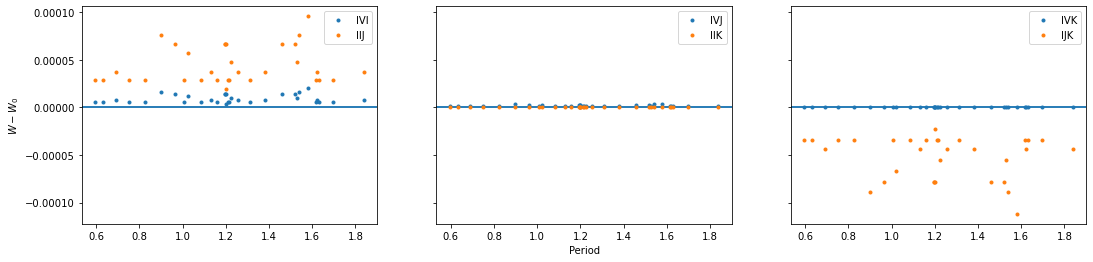

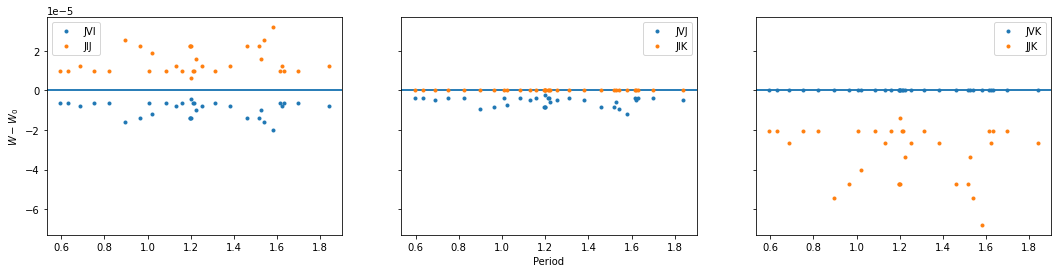

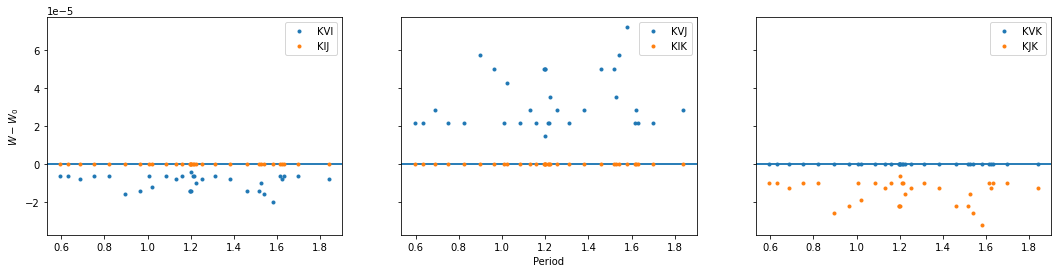

In [1]:
#gold = jesper
#j[['name', 'logP', 'IRSB', 'EBV', 'B_mag', 'V_mag', 'I_mag', 'J_mag', 'H_mag', 'K_mag', 'Wvi','Wjk']]
from lvtlaw.main_modules import * 
import matplotlib.pyplot as plt
from lvtlaw.a_utils import imgsave 
from data.datamapping import R_ratio, file_name, wes_show
from lvtlaw.b_data_transform import pltwes_deviation_

#A = {'B': 1.2574, 'V': 1.0, 'R': 0.845,'I': 0.609,'J': 0.2969,'H': 0.1816,'K': 0.1231 }   			 
#A = {'B': 1.31, 'V': 1.0, 'R': 0.845,'I': 0.608,'J': 0.292,'H': 0.181,'K': 0.119 }
#A = {'B': 1.28, 'V': 1.0, 'R': 0.845,'I': 0.608,'J': 0.292,'H': 0.181,'K': 0.119 }   
A = {'V': 1.00,'I': 0.70,'J': 0.38,'K': 0.20}
			 
R_v = 2.53
R, R_v, A = R_ratio(R_v, mag, A)

data = pd.read_csv(f'data/input/{file_name}.csv')
intro()
raw, absolute, extinction, tabsolute, wesenheit, merged_data = mag_transformation(data, A, R)
wesenheit.head().style
print(len(wes_show))
for m in mag:
    pltwes_deviation_(m,wesenheit, f'{file_name}_W', '_s', s=0)

In [5]:
wesenheit.head().style

,name,logP,EBV,IRSB,VVI_s,VVI_s0,IVI_s,IVI_s0,JVI_s,JVI_s0,KVI_s,KVI_s0,VVJ_s,VVJ_s0,IVJ_s,IVJ_s0,JVJ_s,JVJ_s0,KVJ_s,KVJ_s0,VVK_s,VVK_s0,IVK_s,IVK_s0,JVK_s,JVK_s0,KVK_s,KVK_s0,VIJ_s,VIJ_s0,IIJ_s,IIJ_s0,JIJ_s,JIJ_s0,KIJ_s,KIJ_s0,VIK_s,VIK_s0,IIK_s,IIK_s0,JIK_s,JIK_s0,KIK_s,KIK_s0,VJK_s,VJK_s0,IJK_s,IJK_s0,JJK_s,JJK_s0,KJK_s,KJK_s0
0,HV1328,1.199692,0.016000,18.395000,11.718907,11.718903,11.718907,11.718903,12.048493,12.048497,12.086093,12.086097,12.252080,12.252057,12.091360,12.091359,12.250920,12.250922,12.193480,12.193465,12.178250,12.178250,12.040375,12.040375,12.223375,12.223375,12.178250,12.178250,12.751003,12.750977,12.441346,12.441327,12.440907,12.440901,12.292625,12.292625,12.454000,12.454000,12.233400,12.233400,12.328160,12.328160,12.233400,12.233400,11.925800,11.925832,11.863660,11.863683,12.127365,12.127379,12.127760,12.127766
1,HV1333,1.212084,0.024000,19.255000,11.878947,11.878941,11.878947,11.878941,12.187453,12.187459,12.210053,12.210059,12.378452,12.378418,12.227659,12.227658,12.377023,12.377027,12.310862,12.310840,12.293250,12.293250,12.168875,12.168875,12.345275,12.345275,12.293250,12.293250,12.845676,12.845637,12.555632,12.555603,12.555044,12.555034,12.403500,12.403500,12.542000,12.542000,12.343000,12.343000,12.439800,12.439800,12.343000,12.343000,12.002080,12.002129,11.965056,11.965090,12.234534,12.234555,12.235016,12.235026
2,HV1335,1.157800,0.024000,18.624000,12.101266,12.101260,12.101266,12.101260,12.416934,12.416940,12.428734,12.428740,12.612204,12.612170,12.458043,12.458042,12.610871,12.610875,12.531774,12.531752,12.511000,12.511000,12.388000,12.388000,12.573000,12.573000,12.511000,12.511000,13.090195,13.090156,12.793490,12.793461,12.792955,12.792945,12.626625,12.626625,12.757000,12.757000,12.560200,12.560200,12.666480,12.666480,12.560200,12.560200,12.164480,12.164529,12.145436,12.145470,12.441229,12.441250,12.441696,12.441706
3,HV1345,1.129670,0.031000,18.731000,12.230585,12.230577,12.230585,12.230577,12.480415,12.480423,12.443415,12.443423,12.635280,12.635236,12.513010,12.513008,12.633970,12.633975,12.525180,12.525152,12.497000,12.497000,12.417000,12.417000,12.582000,12.582000,12.497000,12.497000,13.013735,13.013685,12.778770,12.778732,12.778215,12.778202,12.600125,12.600125,12.657000,12.657000,12.529000,12.529000,12.642800,12.642800,12.529000,12.529000,12.022600,12.022663,12.084920,12.084964,12.401630,12.401657,12.402120,12.402133
4,HV822,1.223807,0.039000,19.078000,11.640621,11.640611,11.640621,11.640611,12.013579,12.013589,12.020379,12.020389,12.244080,12.244025,12.062110,12.062108,12.242670,12.242676,12.141980,12.141944,12.115750,12.115750,11.973125,11.973125,12.194525,12.194525,12.115750,12.115750,12.808719,12.808656,12.458258,12.458211,12.457711,12.457695,12.254125,12.254125,12.401000,12.401000,12.172800,12.172800,12.302920,12.302920,12.172800,12.172800,11.675840,11.675919,11.665188,11.665243,12.027257,12.027291,12.027768,12.027784


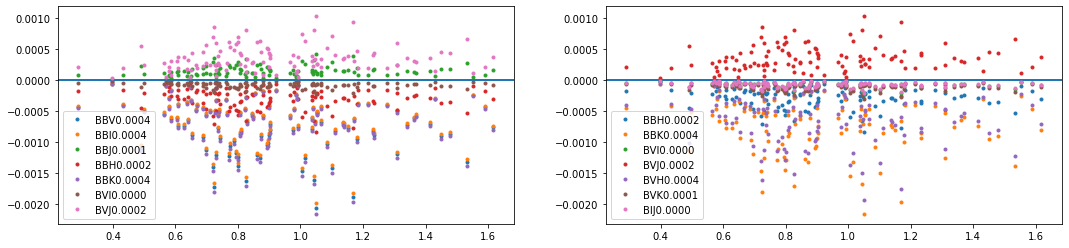

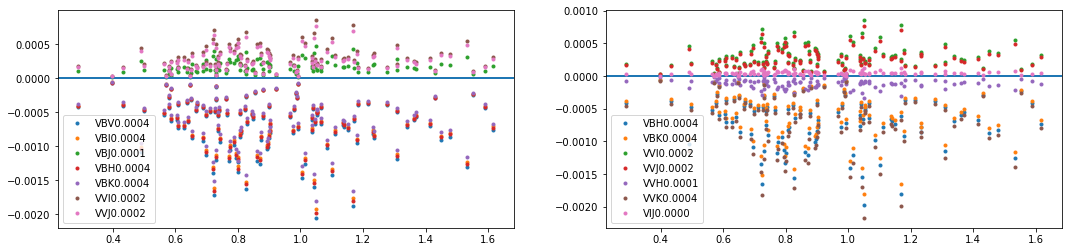

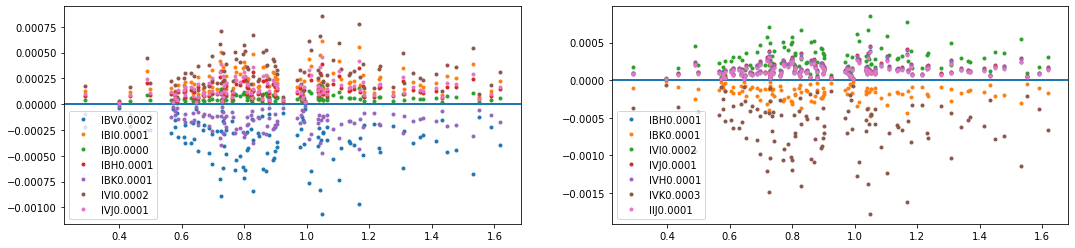

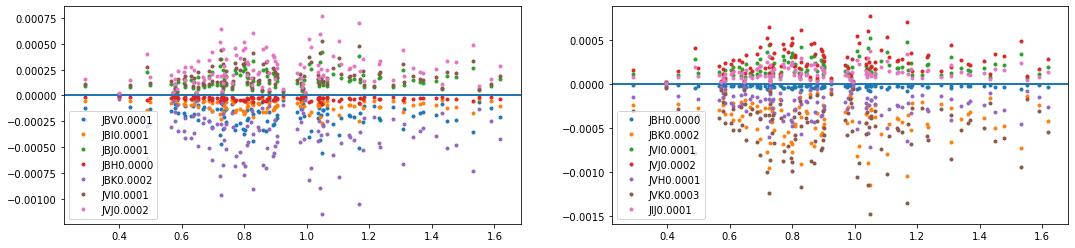

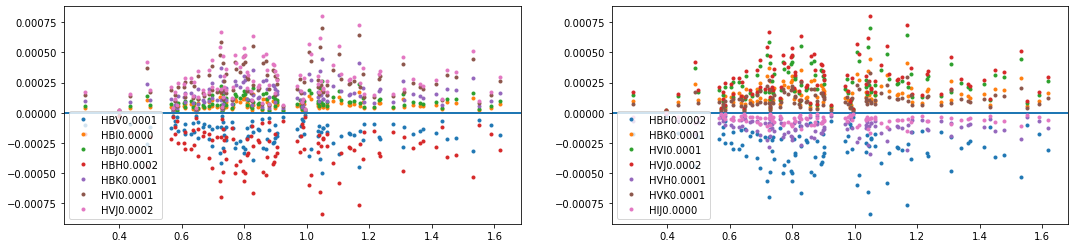

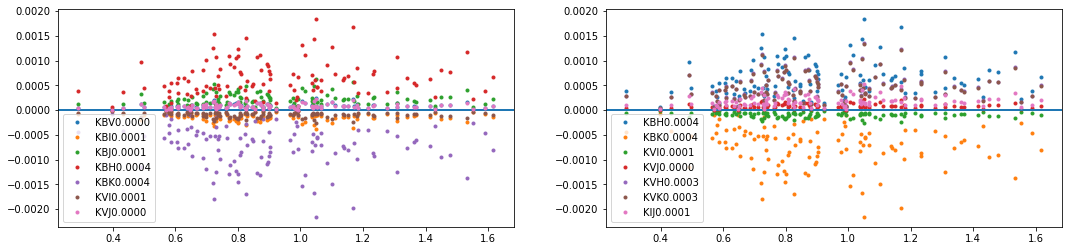

In [48]:
#PLW_mc, residue, prediction, merged_data = PLWcorrection(merged_data, plots=0) # c_pl_pw
#residue
def pltwes_magwise(m, wesenheit):
    fig_res, axs_res = plt.subplots(1, 2, figsize=(18, 4))
    axs_res = axs_res.flatten()
    for col in range(7):
        dev = wesenheit[f'{m}{wes_show[col]}_j']-wesenheit[f'{m}{wes_show[col]}_j0']
        axs_res[0].axhline(0)#, color='red', linestyle='--', linewidth=1)
        axs_res[0].plot(wesenheit.logP, dev, '.', label =m+wes_show[col] + f'{dev.std():.4f}')
        dev = wesenheit[f'{m}{wes_show[col+3]}_j']-wesenheit[f'{m}{wes_show[col+3]}_j0']
        axs_res[1].axhline(0)#, color='red', linestyle='--', linewidth=1)
        axs_res[1].plot(wesenheit.logP, dev, '.', label =m+wes_show[col+3] + f'{dev.std():.4f}')
        #dev = wesenheit[f'{m}{wes_show[col+10]}_j']-wesenheit[f'{m}{wes_show[col+10]}_j0']
        #axs_res[2].axhline(0)#, color='red', linestyle='--', linewidth=1)
        #axs_res[2].plot(wesenheit.logP, dev, '.', label =m+wes_show[col+10])
    axs_res[1].legend()
    axs_res[0].legend() 
    #axs_res[2].legend()
    #imgsave(m)
    plt.show()

for m in mag: pltwes_magwise(m, wesenheit)

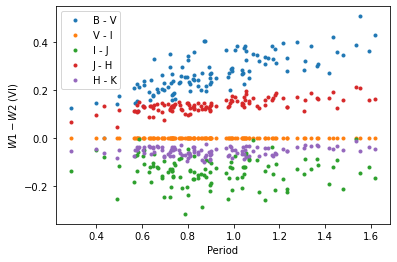

In [45]:
import matplotlib.pyplot as plt
col = 'VI'
wes=wesenheit[[f'{m}{col}{dis_flag[0]}' for m in mag]+['logP']]
de=[]
for m in range(len(mag)-1):
    x = wes[f'{mag[m]}{col}{dis_flag[0]}']-wes[f'{mag[m+1]}{col}{dis_flag[0]}']
    plt.plot(wes['logP'], x, '.', label= f'{mag[m]} - {mag[m+1]}')
    de.append(x)
plt.legend()
plt.ylabel(f'$W1 - W2$ ({col})')
plt.xlabel('Period')
plt.show()

